In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
dir = 'C:\\Users\\Lenovo\\Downloads\\BIRDS 525'

In [4]:
os.listdir(dir)

['birds.csv',
 'EfficientNetB0-525-(224 X 224)- 98.97.h5',
 'efficientnetb0_notop.h5',
 'filtered',
 'final_model.h5',
 'test',
 'train',
 'valid']

In [5]:
train_path = dir + '\\train\\'
test_path = dir + '\\test\\'
validation_path = dir + '\\valid\\'

In [6]:
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\Lenovo\Downloads\BIRDS 525\train\
test path: C:\Users\Lenovo\Downloads\BIRDS 525\test\
validation path: C:\Users\Lenovo\Downloads\BIRDS 525\valid\


In [7]:
os.listdir(test_path)

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [8]:
os.listdir(train_path + str(os.listdir(train_path)[0]))

['001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '007.jpg',
 '008.jpg',
 '009.jpg',
 '010.jpg',
 '011.jpg',
 '012.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '017.jpg',
 '018.jpg',
 '019.jpg',
 '020.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '024.jpg',
 '025.jpg',
 '026.jpg',
 '027.jpg',
 '028.jpg',
 '029.jpg',
 '030.jpg',
 '031.jpg',
 '032.jpg',
 '033.jpg',
 '034.jpg',
 '035.jpg',
 '036.jpg',
 '037.jpg',
 '038.jpg',
 '039.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '046.jpg',
 '047.jpg',
 '048.jpg',
 '049.jpg',
 '050.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '054.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '061.jpg',
 '062.jpg',
 '063.jpg',
 '064.jpg',
 '065.jpg',
 '066.jpg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '070.jpg',
 '071.jpg',
 '072.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '076.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg',
 '081.jpg',
 '082.jpg',
 '083.jpg',
 '08

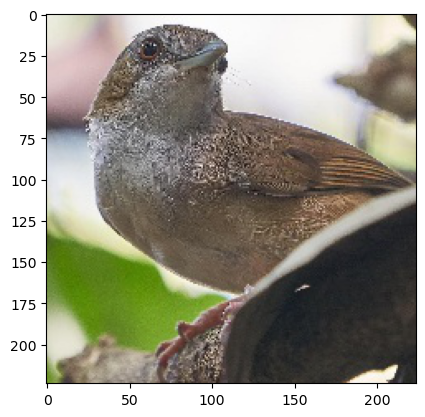

In [9]:
plt.imshow(plt.imread(train_path + 'ABBOTTS BABBLER\\' + '001.jpg'))

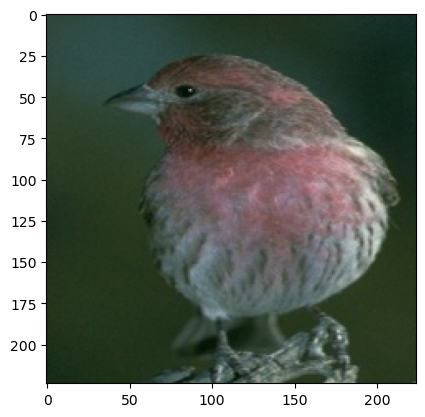

In [10]:
plt.imshow(plt.imread(train_path + 'HOUSE FINCH\\' + '001.jpg'))

In [11]:
string = os.listdir(train_path)
cleaned_list = []

for string in string:
    cleaned_string = string.replace("[", "").replace(",", "").replace(",", "")
    cleaned_list.append(cleaned_string)

In [12]:
cleaned_list

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [13]:
len(cleaned_list)

525

In [14]:
for i in range(len(cleaned_list)):
    print("Class: ", cleaned_list[i], "Number of instances: ", len(os.listdir(train_path + '\\' + str(cleaned_list[i]))))

Class:  ABBOTTS BABBLER Number of instances:  163
Class:  ABBOTTS BOOBY Number of instances:  180
Class:  ABYSSINIAN GROUND HORNBILL Number of instances:  179
Class:  AFRICAN CROWNED CRANE Number of instances:  135
Class:  AFRICAN EMERALD CUCKOO Number of instances:  154
Class:  AFRICAN FIREFINCH Number of instances:  137
Class:  AFRICAN OYSTER CATCHER Number of instances:  155
Class:  AFRICAN PIED HORNBILL Number of instances:  187
Class:  AFRICAN PYGMY GOOSE Number of instances:  179
Class:  ALBATROSS Number of instances:  132
Class:  ALBERTS TOWHEE Number of instances:  161
Class:  ALEXANDRINE PARAKEET Number of instances:  165
Class:  ALPINE CHOUGH Number of instances:  166
Class:  ALTAMIRA YELLOWTHROAT Number of instances:  150
Class:  AMERICAN AVOCET Number of instances:  179
Class:  AMERICAN BITTERN Number of instances:  170
Class:  AMERICAN COOT Number of instances:  158
Class:  AMERICAN DIPPER Number of instances:  193
Class:  AMERICAN FLAMINGO Number of instances:  164
Class:

Class:  COPPERSMITH BARBET Number of instances:  196
Class:  COPPERY TAILED COUCAL Number of instances:  144
Class:  CRAB PLOVER Number of instances:  144
Class:  CRANE HAWK Number of instances:  135
Class:  CREAM COLORED WOODPECKER Number of instances:  139
Class:  CRESTED AUKLET Number of instances:  160
Class:  CRESTED CARACARA Number of instances:  155
Class:  CRESTED COUA Number of instances:  152
Class:  CRESTED FIREBACK Number of instances:  142
Class:  CRESTED KINGFISHER Number of instances:  163
Class:  CRESTED NUTHATCH Number of instances:  152
Class:  CRESTED OROPENDOLA Number of instances:  164
Class:  CRESTED SERPENT EAGLE Number of instances:  181
Class:  CRESTED SHRIKETIT Number of instances:  156
Class:  CRESTED WOOD PARTRIDGE Number of instances:  197
Class:  CRIMSON CHAT Number of instances:  154
Class:  CRIMSON SUNBIRD Number of instances:  198
Class:  CROW Number of instances:  163
Class:  CUBAN TODY Number of instances:  162
Class:  CUBAN TROGON Number of instances

Class:  LUCIFER HUMMINGBIRD Number of instances:  168
Class:  MAGPIE GOOSE Number of instances:  142
Class:  MALABAR HORNBILL Number of instances:  154
Class:  MALACHITE KINGFISHER Number of instances:  163
Class:  MALAGASY WHITE EYE Number of instances:  143
Class:  MALEO Number of instances:  159
Class:  MALLARD DUCK Number of instances:  135
Class:  MANDRIN DUCK Number of instances:  154
Class:  MANGROVE CUCKOO Number of instances:  137
Class:  MARABOU STORK Number of instances:  197
Class:  MASKED BOBWHITE Number of instances:  183
Class:  MASKED BOOBY Number of instances:  132
Class:  MASKED LAPWING Number of instances:  131
Class:  MCKAYS BUNTING Number of instances:  187
Class:  MERLIN Number of instances:  209
Class:  MIKADO  PHEASANT Number of instances:  154
Class:  MILITARY MACAW Number of instances:  208
Class:  MOURNING DOVE Number of instances:  153
Class:  MYNA Number of instances:  141
Class:  NICOBAR PIGEON Number of instances:  154
Class:  NOISY FRIARBIRD Number of in

Class:  VIOLET TURACO Number of instances:  162
Class:  VISAYAN HORNBILL Number of instances:  163
Class:  VULTURINE GUINEAFOWL Number of instances:  169
Class:  WALL CREAPER Number of instances:  172
Class:  WATTLED CURASSOW Number of instances:  138
Class:  WATTLED LAPWING Number of instances:  142
Class:  WHIMBREL Number of instances:  138
Class:  WHITE BREASTED WATERHEN Number of instances:  161
Class:  WHITE BROWED CRAKE Number of instances:  154
Class:  WHITE CHEEKED TURACO Number of instances:  153
Class:  WHITE CRESTED HORNBILL Number of instances:  159
Class:  WHITE EARED HUMMINGBIRD Number of instances:  176
Class:  WHITE NECKED RAVEN Number of instances:  160
Class:  WHITE TAILED TROPIC Number of instances:  175
Class:  WHITE THROATED BEE EATER Number of instances:  164
Class:  WILD TURKEY Number of instances:  153
Class:  WILLOW PTARMIGAN Number of instances:  195
Class:  WILSONS BIRD OF PARADISE Number of instances:  155
Class:  WOOD DUCK Number of instances:  214
Class:  

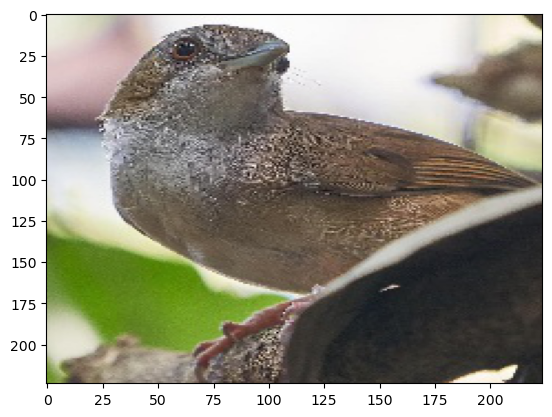

In [15]:
plt.imshow(plt.imread(train_path + cleaned_list[0] + '\\' + '00' + str(1) + '.jpg'), aspect='auto')

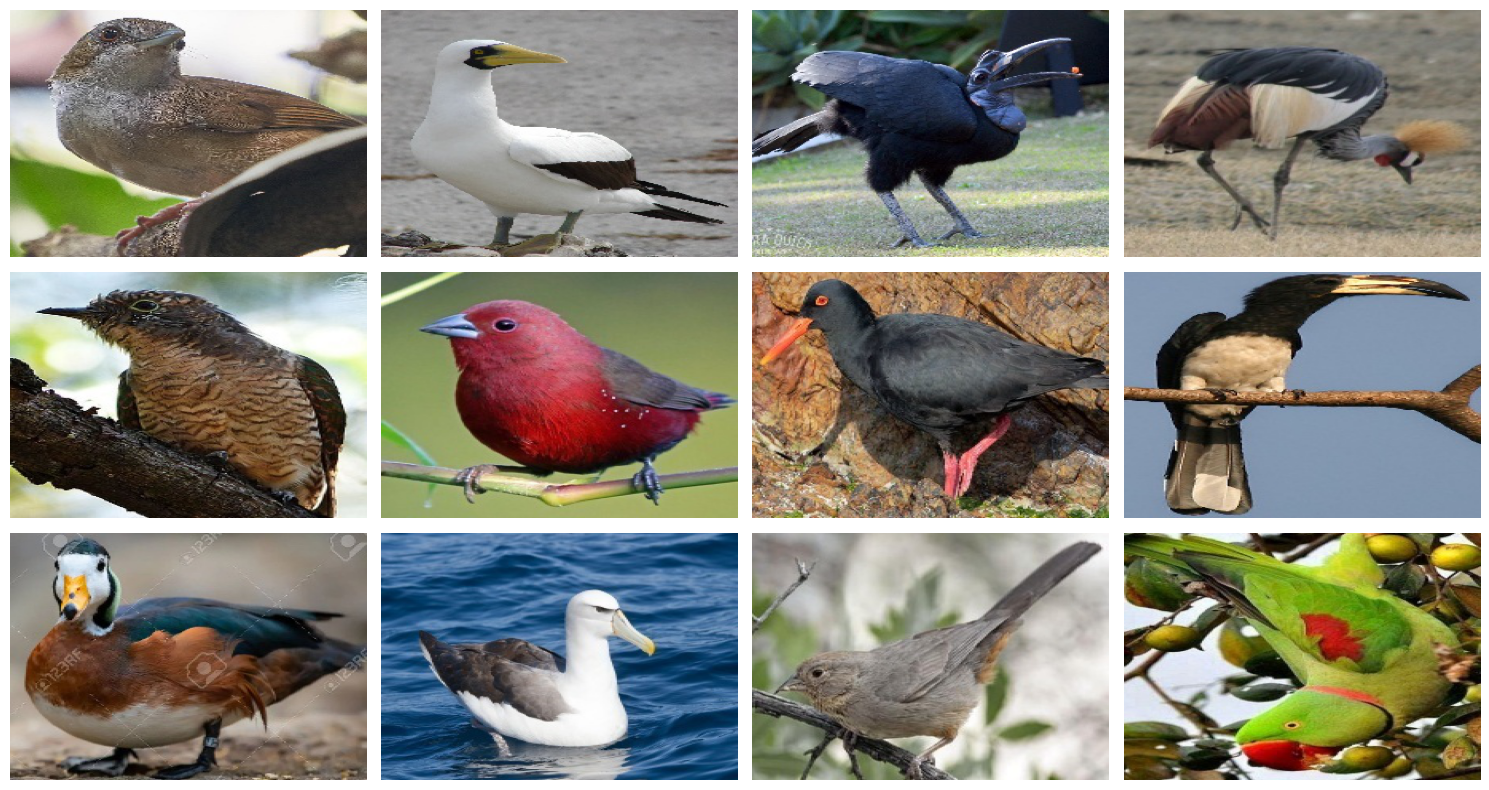

In [16]:
num_images = 12
num_cols = 4
num_rows = num_images // num_cols + (num_images % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    if i < 9:
        img_path = os.path.join(train_path, cleaned_list[i], '00' + str(i + 1) + '.jpg')
    else:
        img_path = os.path.join(train_path, cleaned_list[i], '0' + str(i + 1) + '.jpg')
        
    img = plt.imread(img_path)
    axes[row, col].imshow(img, aspect='auto')
    axes[row, col].axis('off')

for j in range(i+1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [17]:
def count_images(directory):
    class_counts = defaultdict(int)
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            num_images = len([img for img in os.listdir(class_dir) if img.endswith('.jpg') or img.endswith('.png')])
            class_counts[class_name] = num_images
    return class_counts

In [18]:
train_counts = count_images(train_path)
validation_counts = count_images(validation_path)
test_counts = count_images(test_path)

In [19]:
filtered_classes = {class_name for class_name, count in train_counts.items() if count >= 100}

print("Classes with more than 100 images in training set:\n", filtered_classes)

Classes with more than 100 images in training set:
 {'NORTHERN CARDINAL', 'COPPERSMITH BARBET', 'CRESTED WOOD PARTRIDGE', 'CRESTED OROPENDOLA', 'CHESTNET BELLIED EUPHONIA', 'EURASIAN GOLDEN ORIOLE', 'HOUSE FINCH', 'IWI', 'NORTHERN MOCKINGBIRD', 'KIWI', 'NORTHERN FLICKER', 'SAND MARTIN', 'VISAYAN HORNBILL', 'SHORT BILLED DOWITCHER', 'TASMANIAN HEN', 'WILD TURKEY', 'ROSE BREASTED GROSBEAK', 'BARN SWALLOW', 'GRAY PARTRIDGE', 'MANDRIN DUCK', 'GREEN WINGED DOVE', 'ELEGANT TROGON', 'PURPLE MARTIN', 'KING VULTURE', 'ASHY STORM PETREL', 'GREAT XENOPS', 'RED NAPED TROGON', 'RED HEADED DUCK', 'NICOBAR PIGEON', 'STORK BILLED KINGFISHER', 'COPPERY TAILED COUCAL', 'GREAT POTOO', 'COMMON POORWILL', 'CRESTED FIREBACK', 'BANDED BROADBILL', 'COMMON FIRECREST', 'BELTED KINGFISHER', 'CRESTED SHRIKETIT', 'RAZORBILL', 'PURPLE FINCH', 'TAILORBIRD', 'BLUE GRAY GNATCATCHER', 'AFRICAN FIREFINCH', 'TAKAHE', 'FAN TAILED WIDOW', 'MALLARD DUCK', 'GOLDEN CHLOROPHONIA', 'LAZULI BUNTING', 'LITTLE AUK', 'CRIMSON SUNBI

In [20]:
def filter_directory(source_dir, dest_dir, classes_to_include):
    os.makedirs(dest_dir, exist_ok=True)
    for class_name in classes_to_include:
        src_class_dir = os.path.join(source_dir, class_name)
        if os.path.exists(src_class_dir):
            dst_class_dir = os.path.join(dest_dir, class_name)
            os.makedirs(dst_class_dir, exist_ok=True)
            for img_name in os.listdir(src_class_dir):
                if img_name.endswith('.jpg') or img_name.endswith('.png'):
                    src_img_path = os.path.join(src_class_dir, img_name)
                    dst_img_path = os.path.join(dst_class_dir, img_name)
                    os.link(src_img_path, dst_img_path)

In [21]:
filtered_train_path = 'C:\\Users\\Lenovo\\Downloads\\BIRDS 525\\filtered\\train'
filtered_validation_path = 'C:\\Users\\Lenovo\\Downloads\\BIRDS 525\\filtered\\valid'
filtered_test_path = 'C:\\Users\\Lenovo\\Downloads\\BIRDS 525\\filtered\\test'

In [ ]:
filter_directory(train_path, filtered_train_path, filtered_classes)
filter_directory(validation_path, filtered_validation_path, filtered_classes)
filter_directory(test_path, filtered_test_path, filtered_classes)

In [22]:
len(os.listdir(filtered_train_path))

525

In [23]:
len(os.listdir(filtered_test_path))

525

In [24]:
len(os.listdir(filtered_validation_path))

525

In [25]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'WATTLED CURASSOW\\'):
    img = imread(test_path + '\\' + cleaned_list[int(random.randint(0, len(cleaned_list)))] + '\\' + image_filename)
    d1, d2, num_channels = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [26]:
print([dim1[i]  for i in range(5)])
print([dim2[i] for i in range(5)])

[224, 224, 224, 224, 224]
[224, 224, 224, 224, 224]


In [29]:
print(imread(test_path + '\\' + cleaned_list[int(random.randint(0, len(cleaned_list) - 1))] + '\\' + image_filename).max())
print(imread(test_path + '\\' + cleaned_list[int(random.randint(0, len(cleaned_list) - 1))] + '\\' + image_filename).min())

255
0


In [30]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [31]:
num_rand = int(random.randint(0, len(cleaned_list)))

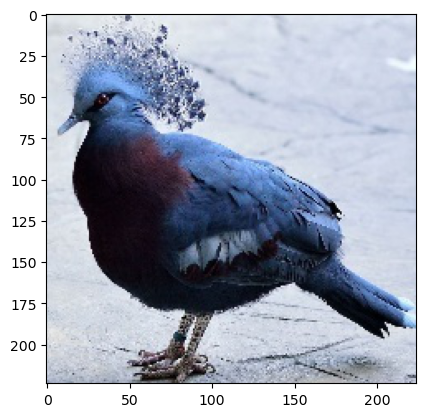

In [32]:
plt.imshow(imread(test_path + '\\' + cleaned_list[num_rand] + '\\' + image_filename))

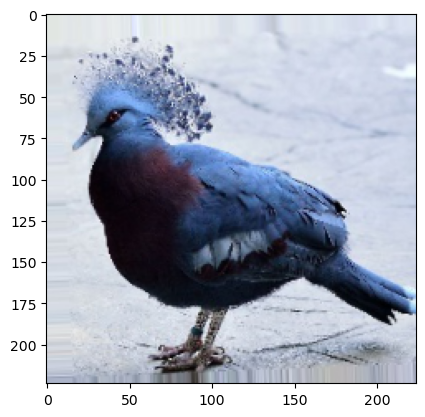

In [33]:
plt.imshow(image_generator.random_transform(
    imread(test_path + '\\' + cleaned_list[num_rand] + '\\' + image_filename)))

In [34]:
image_generator.flow_from_directory(filtered_train_path)

Found 84635 images belonging to 525 classes.


In [35]:
image_generator.flow_from_directory(filtered_validation_path)

Found 2625 images belonging to 525 classes.


In [36]:
image_generator.flow_from_directory(filtered_test_path)

Found 2625 images belonging to 525 classes.


In [37]:
len(cleaned_list)

525

In [38]:
eff_net_model = EfficientNetB0(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(224,224,3),
                    pooling='max',
                    classes=len(cleaned_list)
                )

for layer in eff_net_model.layers:
    layer.trainable = False

In [48]:
model = Sequential([
    eff_net_model,
    Dense(2560,activation='relu'),
    BatchNormalization(),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(len(cleaned_list), activation='softmax')
])


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_4 (Dense)             (None, 2560)              3279360   
                                                                 
 batch_normalization_2 (Batc  (None, 2560)             10240     
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_3 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 1024)             

In [50]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04) ,loss = 'categorical_crossentropy',metrics = 'accuracy')

In [42]:
batch_size = 32

In [43]:
train_image_generator = image_generator.flow_from_directory(filtered_train_path,
                                                            target_size=(224, 224),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 84635 images belonging to 525 classes.


In [44]:
validation_image_generator = image_generator.flow_from_directory(filtered_validation_path,
                                                            target_size=(224, 224),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 2625 images belonging to 525 classes.


In [45]:
test_image_generator = image_generator.flow_from_directory(filtered_test_path,
                                                            target_size=(224, 224),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 2625 images belonging to 525 classes.


In [51]:
history = model.fit(train_image_generator, validation_data=validation_image_generator, epochs=8)

Epoch 1/8
2645/2645 [==============================] - 8179s 3s/step - loss: 1.3357 - accuracy: 0.7306 - val_loss: 0.3559 - val_accuracy: 0.9101
Epoch 2/8
2645/2645 [==============================] - 8087s 3s/step - loss: 0.4580 - accuracy: 0.8816 - val_loss: 0.2521 - val_accuracy: 0.9295
Epoch 3/8
2645/2645 [==============================] - 7990s 3s/step - loss: 0.3488 - accuracy: 0.9053 - val_loss: 0.2519 - val_accuracy: 0.9341
Epoch 4/8
2645/2645 [==============================] - 7944s 3s/step - loss: 0.2908 - accuracy: 0.9179 - val_loss: 0.2319 - val_accuracy: 0.9352
Epoch 5/8
2645/2645 [==============================] - 7643s 3s/step - loss: 0.2542 - accuracy: 0.9268 - val_loss: 0.2274 - val_accuracy: 0.9371
Epoch 6/8
2645/2645 [==============================] - 7090s 3s/step - loss: 0.2283 - accuracy: 0.9318 - val_loss: 0.2204 - val_accuracy: 0.9375
Epoch 7/8
2645/2645 [==============================] - 7137s 3s/step - loss: 0.2058 - accuracy: 0.9391 - val_loss: 0.2089 - val_ac

In [52]:
y_pred = model.predict(test_image_generator)
y_pred = np.argmax(y_pred, axis=1)

83/83 [==============================] - 227s 3s/step


In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

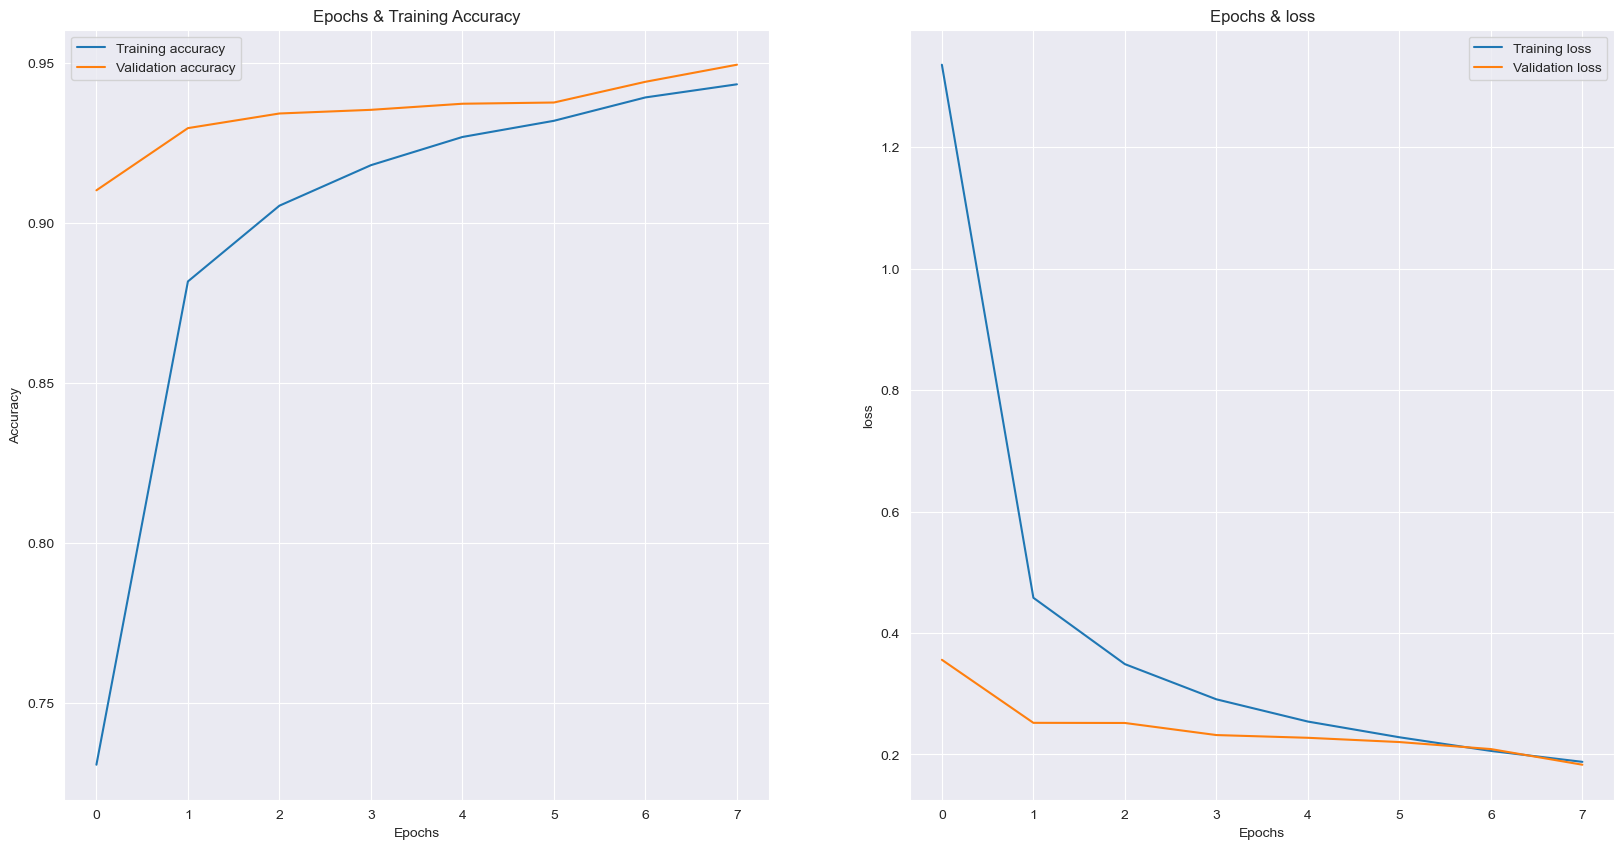

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Training accuracy')
ax[0].plot(val_acc, label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy')
ax[0].legend()


ax[1].plot(loss, label = 'Training loss')
ax[1].plot(val_loss, label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss')
ax[1].legend()

In [55]:
test_data = model.evaluate(test_image_generator)
print("Validation Loss :",test_data[0])
print("Validation Accuracy :",test_data[1])

83/83 [==============================] - 213s 3s/step - loss: 0.1187 - accuracy: 0.9672
Validation Loss : 0.11874105781316757
Validation Accuracy : 0.9672380685806274
